## TP 06: Procesamiento Morfologico

In [1]:
from skimage import data, io, filters
from skimage.color import rgb2gray
import numpy as np
import matplotlib.pyplot as plt
from skimage import data
from scipy import misc
from skimage.util.dtype import dtype_range
import seaborn as sns
import matplotlib.image as mpimg

# Importamos las imagenes a utilizar

In [2]:
pwd

'/home/human/Dropbox/doctorado/chapter00_courses/procesamiento_digital_imagenes'

In [3]:
img1 = rgb2gray(io.imread('/home/human/Dropbox/doctorado/chapter00_courses/procesamiento_digital_imagenes/planetario.jpg'))
img2 = rgb2gray(io.imread('/home/human/Dropbox/doctorado/chapter00_courses/procesamiento_digital_imagenes/totem.jpg'))

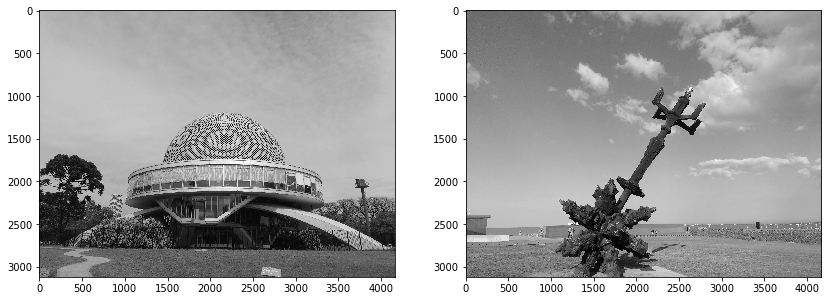

In [4]:
f, axarr = plt.subplots(1,2)
f.set_size_inches(14, 8)
axarr[0].imshow(img1, cmap=plt.cm.gray)
axarr[1].imshow(img2, cmap=plt.cm.gray)
axarr[0].grid(False)
axarr[1].grid(False)
plt.show()

In [5]:
def morfo(img, kernel, funcion):
    # Definimos el margen del kernel
    margenk = int(np.floor(np.shape(kernel)[0]/2))
    img_conv = np.zeros((np.shape(img)[0]+2*margenk,np.shape(img)[1]+2*margenk))
    
    # img_conv contendra la imagen original + los pixeles repetidos en los limites borde
    img_conv[margenk:-margenk, margenk:-margenk] = img.copy()
    
    # replicamos los margenes para que el kernel pueda barrer los limites de la imagen
    for margenx in range(margenk):
        img_conv[margenx,:] = img_conv[margenk,:]
        img_conv[img_conv.shape[0]-margenx-1,:] = img_conv[img_conv.shape[0]-margenk-1,:]

    for margeny in range(margenk):
        img_conv[:, margeny] = img_conv[:,margenk]
        img_conv[:, img_conv.shape[1]-margeny-1] = img_conv[:,img_conv.shape[1]-margenk-1]
        
    kersize = np.shape(kernel)
    img_postconv = np.zeros((np.shape(img)[0],np.shape(img)[1]))
    # aplicamos convolucion a toda la imagen
    for i in range(margenk, np.shape(img)[0]):
        for j in range(margenk, np.shape(img)[1]):
            conv_read = img_conv[(i-margenk):(i+margenk+1), (j-margenk):(j+margenk+1)]
            if funcion == 'erosion':
                img_postconv[i-margenk, j-margenk] = conv_read.min()
            if funcion == 'dilatacion':
                img_postconv[i-margenk, j-margenk] = conv_read.max()
            if funcion == 'mediana':
                img_postconv[i-margenk, j-margenk] = np.median(conv_read)    

            #img_postconv[i-margenk, j-margenk] = np.sum(np.multiply(conv_read, kernel))
    
    return img_postconv

# Erosión

In [6]:
kernel_erosion = np.ones((3,3))

In [7]:
img1_erosion_3 = morfo(img1, kernel_erosion, 'erosion')
img2_erosion_3 = morfo(img2, kernel_erosion, 'erosion')

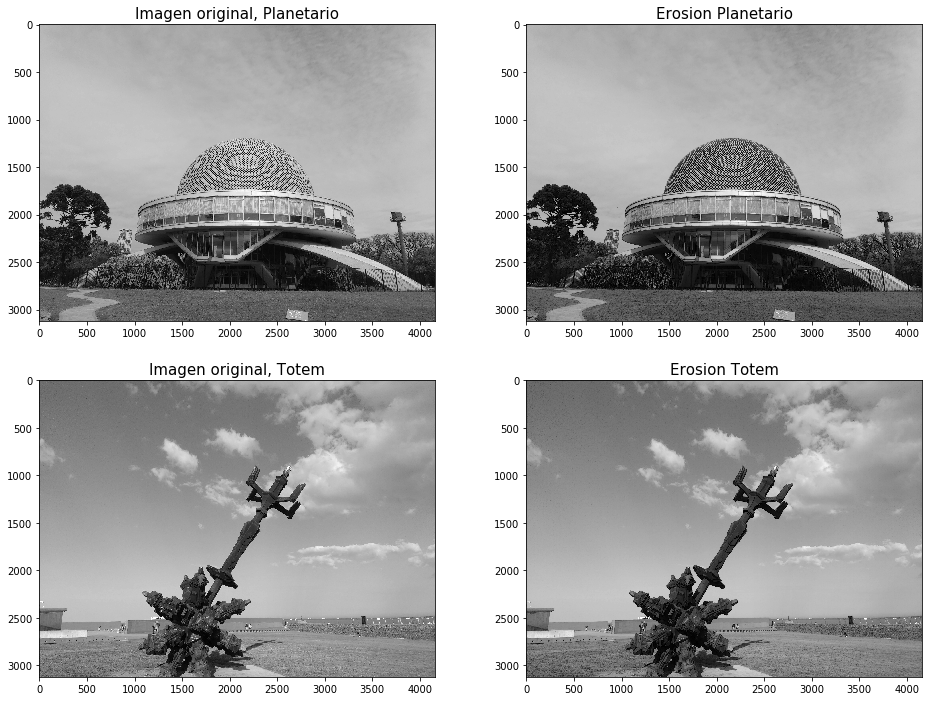

In [9]:
f, axarr = plt.subplots(2,2)
f.set_size_inches(16, 12)
axarr[0,0].imshow(img1, cmap=plt.cm.gray)
axarr[0,0].set_title("Imagen original, Planetario", fontsize=15)
axarr[0,1].imshow(img1_erosion_3, cmap=plt.cm.gray)
axarr[0,1].set_title("Erosion Planetario", fontsize=15)
axarr[1,0].imshow(img2, cmap=plt.cm.gray)
axarr[1,0].set_title("Imagen original, Totem", fontsize=15)
axarr[1,1].imshow(img2_erosion_3, cmap=plt.cm.gray)
axarr[1,1].set_title("Erosion Totem", fontsize=15)
axarr[0,0].grid(False)
axarr[0,1].grid(False)
axarr[1,0].grid(False)
axarr[1,1].grid(False)
plt.show()

# Dilatación

In [11]:
kernel_dilat = np.ones((3,3))

In [12]:
img1_dilat_3 = morfo(img1, kernel_dilat, 'dilatacion')
img2_dilat_3 = morfo(img2, kernel_dilat, 'dilatacion')

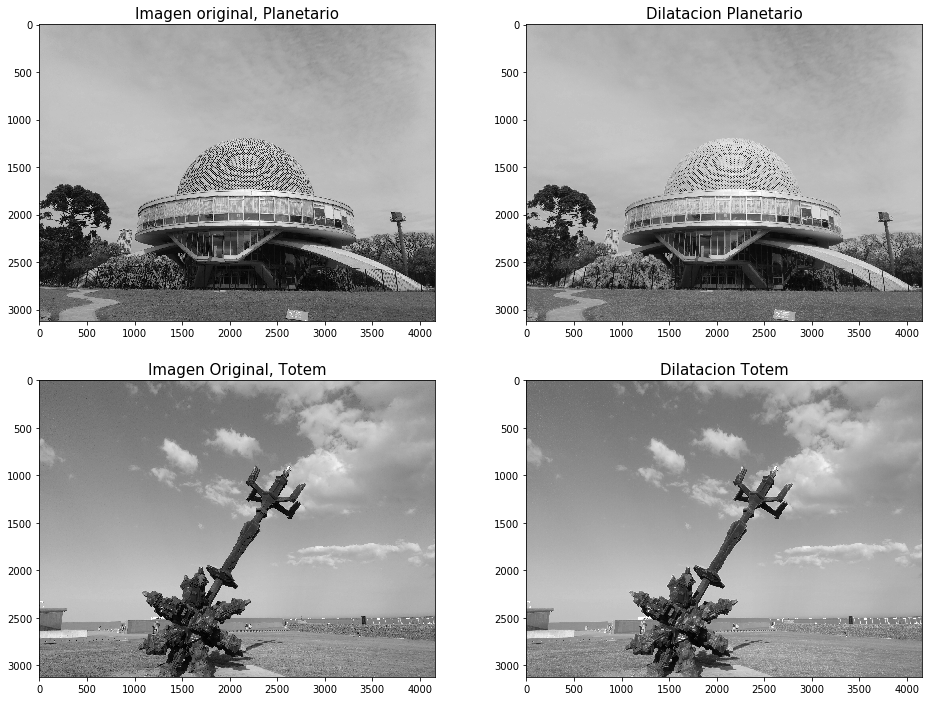

In [13]:
f, axarr = plt.subplots(2,2)
f.set_size_inches(16, 12)
axarr[0,0].imshow(img1, cmap=plt.cm.gray)
axarr[0,0].set_title("Imagen original, Planetario", fontsize=15)
axarr[0,1].imshow(img1_dilat_3, cmap=plt.cm.gray)
axarr[0,1].set_title("Dilatacion Planetario", fontsize=15)
axarr[1,0].imshow(img2, cmap=plt.cm.gray)
axarr[1,0].set_title("Imagen Original, Totem", fontsize=15)
axarr[1,1].imshow(img2_dilat_3, cmap=plt.cm.gray)
axarr[1,1].set_title("Dilatacion Totem", fontsize=15)
axarr[0,0].grid(False)
axarr[0,1].grid(False)
axarr[1,0].grid(False)
axarr[1,1].grid(False)
plt.show()

# Apertura (erosion -> dilatacion)

In [14]:
img1_apertura = morfo(morfo(img1, kernel_dilat, 'erosion'), kernel_dilat, 'dilatacion')
img2_apertura = morfo(morfo(img2, kernel_dilat, 'erosion'), kernel_dilat, 'dilatacion')

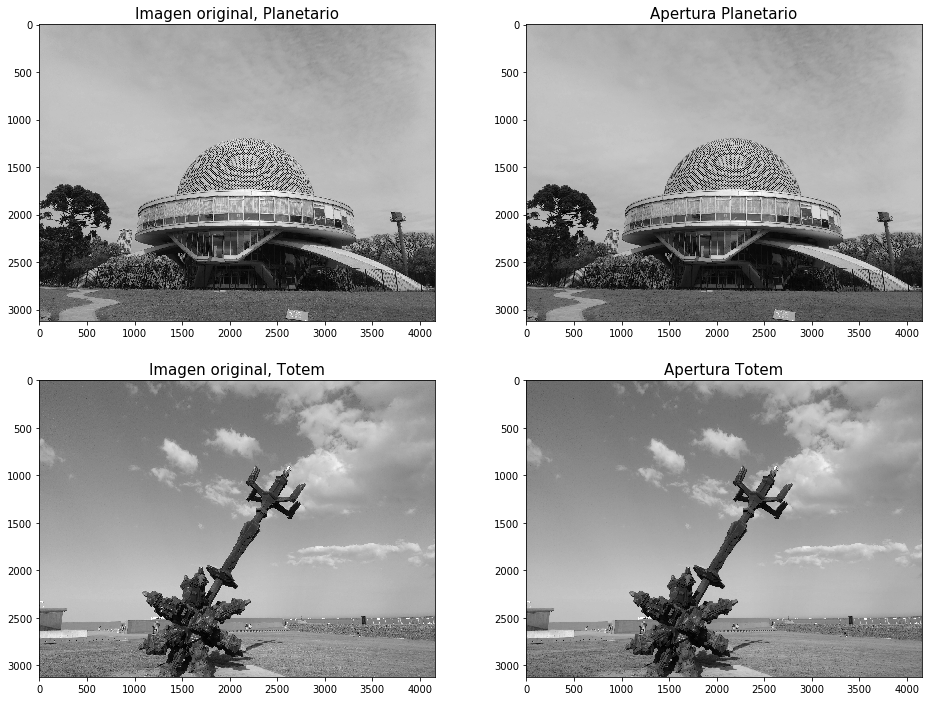

In [15]:
f, axarr = plt.subplots(2,2)
f.set_size_inches(16, 12)
axarr[0,0].imshow(img1, cmap=plt.cm.gray)
axarr[0,0].set_title("Imagen original, Planetario", fontsize=15)
axarr[0,1].imshow(img1_apertura, cmap=plt.cm.gray)
axarr[0,1].set_title("Apertura Planetario", fontsize=15)
axarr[1,0].imshow(img2, cmap=plt.cm.gray)
axarr[1,0].set_title("Imagen original, Totem", fontsize=15)
axarr[1,1].imshow(img2_apertura, cmap=plt.cm.gray)
axarr[1,1].set_title("Apertura Totem", fontsize=15)
axarr[0,0].grid(False)
axarr[0,1].grid(False)
axarr[1,0].grid(False)
axarr[1,1].grid(False)
plt.show()

# Cierre (Dilatacion -> Erosion)

In [16]:
img1_cierre = morfo(morfo(img1, kernel_dilat, 'dilatacion'), kernel_dilat, 'erosion')
img2_cierre = morfo(morfo(img2, kernel_dilat, 'dilatacion'), kernel_dilat, 'erosion')

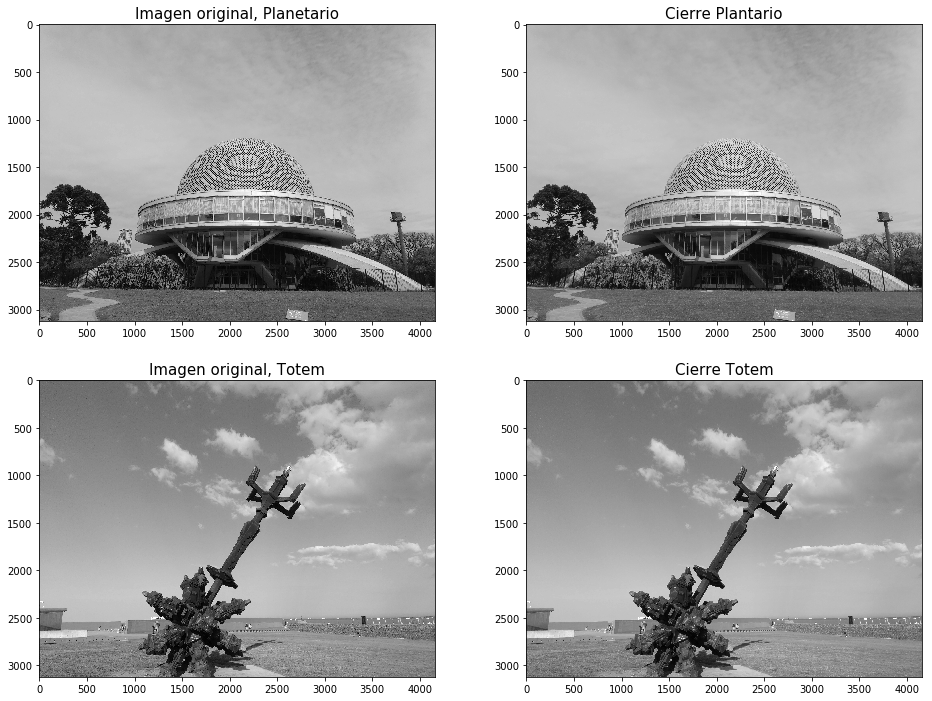

In [17]:
f, axarr = plt.subplots(2,2)
f.set_size_inches(16, 12)
axarr[0,0].imshow(img1, cmap=plt.cm.gray)
axarr[0,0].set_title("Imagen original, Planetario", fontsize=15)
axarr[0,1].imshow(img1_cierre, cmap=plt.cm.gray)
axarr[0,1].set_title("Cierre Plantario", fontsize=15)
axarr[1,0].imshow(img2, cmap=plt.cm.gray)
axarr[1,0].set_title("Imagen original, Totem", fontsize=15)
axarr[1,1].imshow(img2_cierre, cmap=plt.cm.gray)
axarr[1,1].set_title("Cierre Totem", fontsize=15)
axarr[0,0].grid(False)
axarr[0,1].grid(False)
axarr[1,0].grid(False)
axarr[1,1].grid(False)
plt.show()

# Borde Morfologico Interior

In [18]:
img1_borde_interior = morfo(img1, kernel_dilat, 'erosion') - img1
img2_borde_interior = morfo(img2, kernel_dilat, 'erosion') - img2

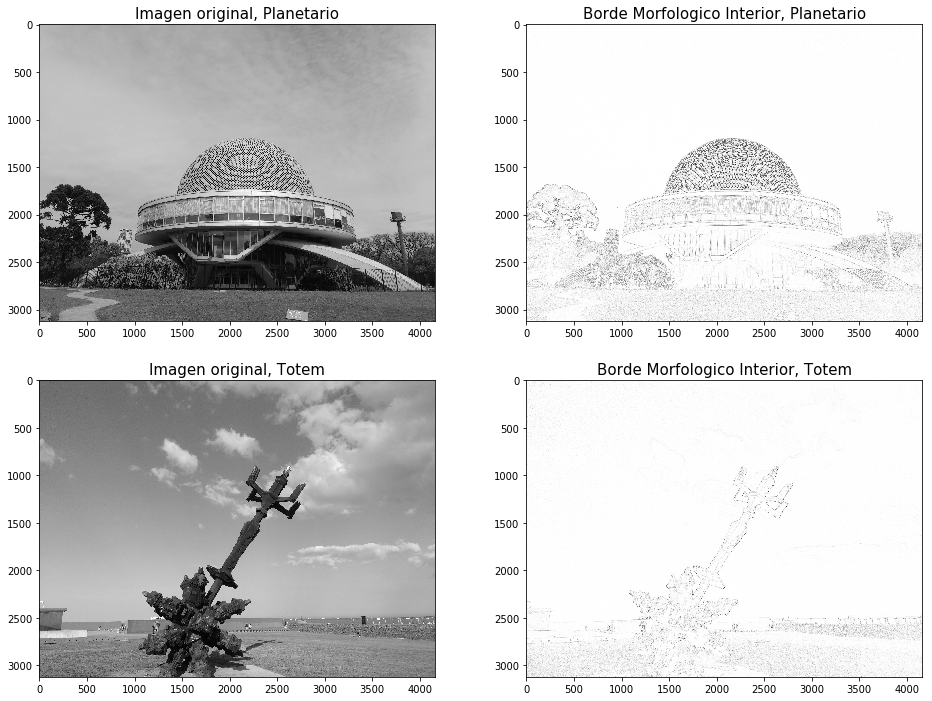

In [19]:
f, axarr = plt.subplots(2,2)
f.set_size_inches(16, 12)
axarr[0,0].imshow(img1, cmap=plt.cm.gray)
axarr[0,0].set_title("Imagen original, Planetario", fontsize=15)
axarr[0,1].imshow(img1_borde_interior, cmap=plt.cm.gray)
axarr[0,1].set_title("Borde Morfologico Interior, Planetario", fontsize=15)
axarr[1,0].imshow(img2, cmap=plt.cm.gray)
axarr[1,0].set_title("Imagen original, Totem", fontsize=15)
axarr[1,1].imshow(img2_borde_interior, cmap=plt.cm.gray)
axarr[1,1].set_title("Borde Morfologico Interior, Totem", fontsize=15)
axarr[0,0].grid(False)
axarr[0,1].grid(False)
axarr[1,0].grid(False)
axarr[1,1].grid(False)
plt.show()

# Borde Morfologico Exterior

In [ ]:
img1_borde_ext = morfo(img1, kernel_dilat, 'dilatacion') - img1
img2_borde_ext = morfo(img2, kernel_dilat, 'dilatacion') - img2

In [ ]:
f, axarr = plt.subplots(2,2)
f.set_size_inches(16, 12)
axarr[0,0].imshow(img1, cmap=plt.cm.gray)
axarr[0,0].set_title("Imagen original, Planetario", fontsize=15)
axarr[0,1].imshow(img1_borde_ext, cmap=plt.cm.gray)
axarr[0,1].set_title("Borde Morfologico Exterior, Planetario", fontsize=15)
axarr[1,0].imshow(img2, cmap=plt.cm.gray)
axarr[1,0].set_title("Imagen original, Totem", fontsize=15)
axarr[1,1].imshow(img2_borde_ext, cmap=plt.cm.gray)
axarr[1,1].set_title("Borde Morfologico Exterior, Totem", fontsize=15)
axarr[0,0].grid(False)
axarr[0,1].grid(False)
axarr[1,0].grid(False)
axarr[1,1].grid(False)
plt.show()

# Funcion Mediana

In [21]:
img1_mediana = morfo(img1, kernel_dilat, 'mediana')
img2_mediana = morfo(img2, kernel_dilat, 'mediana')

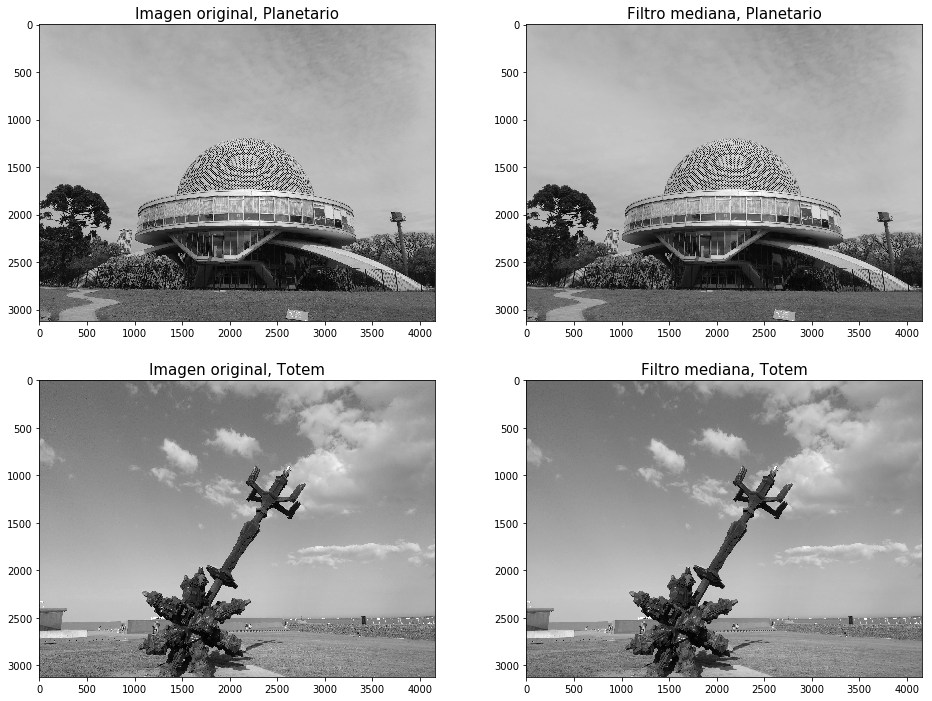

In [22]:
f, axarr = plt.subplots(2,2)
f.set_size_inches(16, 12)
axarr[0,0].imshow(img1, cmap=plt.cm.gray)
axarr[0,0].set_title("Imagen original, Planetario", fontsize=15)
axarr[0,1].imshow(img1_mediana, cmap=plt.cm.gray)
axarr[0,1].set_title("Filtro mediana, Planetario", fontsize=15)
axarr[1,0].imshow(img2, cmap=plt.cm.gray)
axarr[1,0].set_title("Imagen original, Totem", fontsize=15)
axarr[1,1].imshow(img2_mediana, cmap=plt.cm.gray)
axarr[1,1].set_title("Filtro mediana, Totem", fontsize=15)
axarr[0,0].grid(False)
axarr[0,1].grid(False)
axarr[1,0].grid(False)
axarr[1,1].grid(False)
plt.show()

# Top Hat

In [23]:
img1_tophat = img1 - morfo(morfo(img1, kernel_dilat, 'erosion'), kernel_dilat, 'dilatacion')
img2_tophat = img2 - morfo(morfo(img2, kernel_dilat, 'erosion'), kernel_dilat, 'dilatacion')

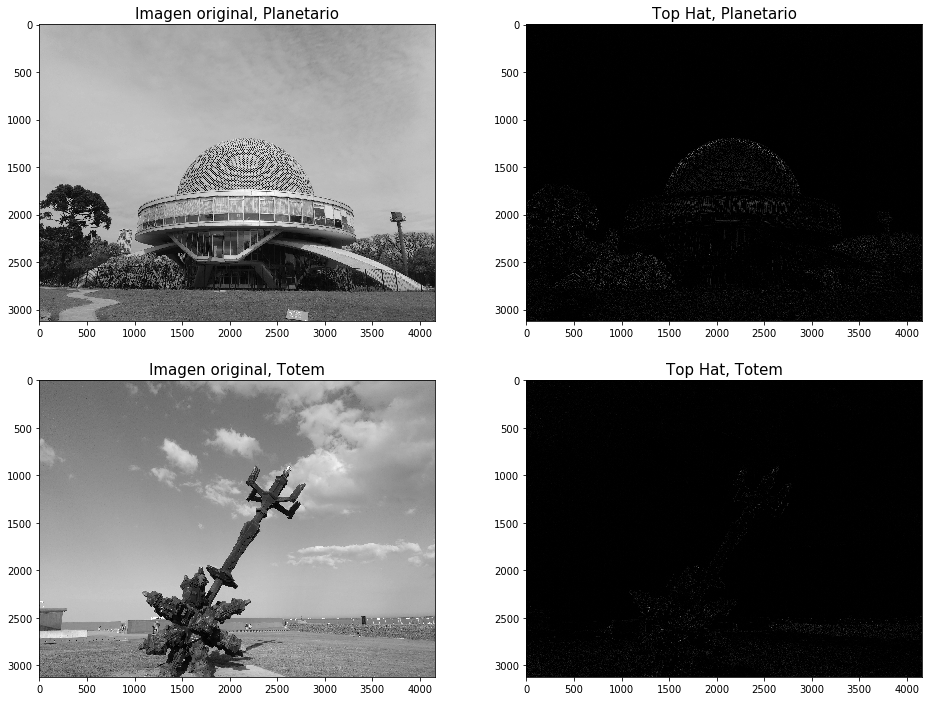

In [24]:
f, axarr = plt.subplots(2,2)
f.set_size_inches(16, 12)
axarr[0,0].imshow(img1, cmap=plt.cm.gray)
axarr[0,0].set_title("Imagen original, Planetario", fontsize=15)
axarr[0,1].imshow(img1_tophat, cmap=plt.cm.gray)
axarr[0,1].set_title("Top Hat, Planetario", fontsize=15)
axarr[1,0].imshow(img2, cmap=plt.cm.gray)
axarr[1,0].set_title("Imagen original, Totem", fontsize=15)
axarr[1,1].imshow(img2_tophat, cmap=plt.cm.gray)
axarr[1,1].set_title("Top Hat, Totem", fontsize=15)
axarr[0,0].grid(False)
axarr[0,1].grid(False)
axarr[1,0].grid(False)
axarr[1,1].grid(False)
plt.show()